# SVM to Classify Breast Cancer as Malignant or Benign

### Load required libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [4]:
df_cancer=pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'],['target']))

In [5]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [74]:
X=df_cancer.drop(['target'], axis=1)

In [75]:
y=df_cancer['target']

### Splitting the dataset

In [76]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=5)
X_train.shape, y_train.shape

((455, 30), (455,))

# Feature Selection using Mutual correlation

In [77]:

mi=mutual_info_classif(X_train, y_train)
mi=pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False)

worst area                 0.472533
worst perimeter            0.463658
worst concave points       0.452125
worst radius               0.442737
mean concave points        0.437729
mean perimeter             0.402169
mean concavity             0.370648
mean radius                0.354806
mean area                  0.344219
worst concavity            0.335422
area error                 0.335267
perimeter error            0.260340
radius error               0.246478
mean compactness           0.220607
worst compactness          0.212011
concave points error       0.139162
worst texture              0.122949
concavity error            0.118837
mean texture               0.093435
compactness error          0.090258
mean smoothness            0.088430
worst symmetry             0.086118
worst fractal dimension    0.079250
worst smoothness           0.077230
mean symmetry              0.046728
fractal dimension error    0.039493
smoothness error           0.029166
mean fractal dimension     0

Lower the value of a feature, then less important it is.

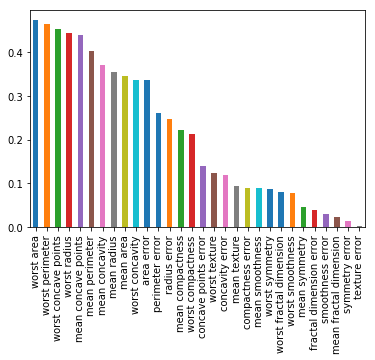

In [78]:
mi.sort_values(ascending=False).plot.bar()

### Selecting top 26 features

In [79]:
sel_=SelectKBest(mutual_info_classif, k=26).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [80]:
X_train=X_train[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']]


In [81]:
X_test=X_test[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']]

### Normalizing training and testing set

In [82]:
min_train=X_train.min()
range_train=(X_train-min_train).max()
X_train_scaled=(X_train-min_train)/range_train


In [83]:
min_test=X_test.min()
range_test=(X_test-min_test).max()
X_test_scaled=(X_test-min_test)/range_test


# Applying SVM to the training set

In [84]:
svc_model=SVC()

In [85]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the model

In [86]:
y_predict=svc_model.predict(X_test_scaled)

In [87]:
cm=confusion_matrix(y_test, y_predict)

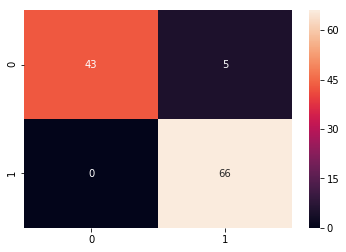

In [88]:
sns.heatmap(cm, annot=True)

### Achieved accuracy 96%

In [89]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        0.0       1.00      0.90      0.95        48
        1.0       0.93      1.00      0.96        66

avg / total       0.96      0.96      0.96       114



# Improving the model by adjusting the parameters of SVM

In [66]:
param_grid={'C':[0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

In [67]:
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9736842105263158, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9144736842105263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8675496688741722, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6423841059602649, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9868421052631579, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9735099337748344, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9736842105263158, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9276315789473685, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [68]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [69]:
grid_predict=grid.predict(X_test_scaled)

In [70]:
cm=confusion_matrix(y_test, grid_predict)

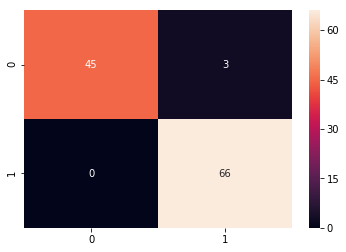

In [71]:
sns.heatmap(cm, annot=True)

In [72]:
print(classification_report(y_test, grid_predict))

             precision    recall  f1-score   support

        0.0       1.00      0.94      0.97        48
        1.0       0.96      1.00      0.98        66

avg / total       0.97      0.97      0.97       114



### Achieved accuracy of 97%